In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from random import randint

In [173]:
#import dataset
covid_cases = pd.read_csv("C:/Users/c2245096/OneDrive - Teesside University/PYTHON ICA/specimenDate_ageDemographic-unstacked.csv")
covid_cases

,areaType,areaCode,areaName,date,newCasesBySpecimenDate-0_4,newCasesBySpecimenDate-0_59,newCasesBySpecimenDate-10_14,newCasesBySpecimenDate-15_19,newCasesBySpecimenDate-20_24,newCasesBySpecimenDate-25_29,...,newCasesBySpecimenDateRollingSum-5_9,newCasesBySpecimenDateRollingSum-60+,newCasesBySpecimenDateRollingSum-60_64,newCasesBySpecimenDateRollingSum-65_69,newCasesBySpecimenDateRollingSum-70_74,newCasesBySpecimenDateRollingSum-75_79,newCasesBySpecimenDateRollingSum-80_84,newCasesBySpecimenDateRollingSum-85_89,newCasesBySpecimenDateRollingSum-90+,newCasesBySpecimenDateRollingSum-unassigned
0,ltla,E06000001,Hartlepool,2020-03-16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ltla,E06000001,Hartlepool,2020-03-17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ltla,E06000001,Hartlepool,2020-03-18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ltla,E06000001,Hartlepool,2020-03-19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ltla,E06000001,Hartlepool,2020-03-20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115022,utla,E10000034,Worcestershire,2020-10-28,2,136,3,23,12,15,...,12,165,63,32,24,14,11,11,10,17
115023,utla,E10000034,Worcestershire,2020-10-29,4,137,6,6,12,13,...,12,167,64,32,27,11,12,11,10,16
115024,utla,E10000034,Worcestershire,2020-10-30,4,129,6,12,16,10,...,14,179,65,31,28,17,15,12,11,17
115025,utla,E10000034,Worcestershire,2020-10-31,6,108,7,14,8,13,...,14,185,62,34,32,18,16,12,11,16


In [174]:
#number of columns in dataset

covid_cases.columns

Index(['areaType', 'areaCode', 'areaName', 'date',
       'newCasesBySpecimenDate-0_4', 'newCasesBySpecimenDate-0_59',
       'newCasesBySpecimenDate-10_14', 'newCasesBySpecimenDate-15_19',
       'newCasesBySpecimenDate-20_24', 'newCasesBySpecimenDate-25_29',
       'newCasesBySpecimenDate-30_34', 'newCasesBySpecimenDate-35_39',
       'newCasesBySpecimenDate-40_44', 'newCasesBySpecimenDate-45_49',
       'newCasesBySpecimenDate-50_54', 'newCasesBySpecimenDate-55_59',
       'newCasesBySpecimenDate-5_9', 'newCasesBySpecimenDate-60+',
       'newCasesBySpecimenDate-60_64', 'newCasesBySpecimenDate-65_69',
       'newCasesBySpecimenDate-70_74', 'newCasesBySpecimenDate-75_79',
       'newCasesBySpecimenDate-80_84', 'newCasesBySpecimenDate-85_89',
       'newCasesBySpecimenDate-90+', 'newCasesBySpecimenDate-unassigned',
       'newCasesBySpecimenDateRollingRate-0_4',
       'newCasesBySpecimenDateRollingRate-0_59',
       'newCasesBySpecimenDateRollingRate-10_14',
       'newCasesBySpecime

In [175]:
#dropping unwanted columns
covid_cases.rename(columns = {'newCasesBySpecimenDate-0_4' : 'Age 0_4', 'newCasesBySpecimenDate-5_9' : 'Age 5_9',
                             'newCasesBySpecimenDate-10_14' : 'Age 10_14', 'newCasesBySpecimenDate-15_19' : 'Age 15_19',
                             'newCasesBySpecimenDate-20_24' : 'Age 20_24', 'newCasesBySpecimenDate-25_29' : 'Age 25_29',
                             'newCasesBySpecimenDate-30_34' : 'Age 30_34', 'newCasesBySpecimenDate-35_39' : 'Age 35_39',
                             'newCasesBySpecimenDate-40_44' : 'Age 40_44', 'newCasesBySpecimenDate-45_49' : 'Age 45_49',
                             'newCasesBySpecimenDate-50_54' : 'Age 50_54', 'newCasesBySpecimenDate-55_59' : 'Age 55_59',
                             'newCasesBySpecimenDate-60_64' : 'Age 60_64', 'newCasesBySpecimenDate-65_69' : 'Age 65_69',
                             'newCasesBySpecimenDate-70_74' : 'Age 70_74', 'newCasesBySpecimenDate-75_79' : 'Age 75_79',
                             'newCasesBySpecimenDate-80_84' : 'Age 80_84', 'newCasesBySpecimenDate-85_89' : 'Age 85_89',
                             'newCasesBySpecimenDate-90+' : 'Age 90+',
                             'newCasesBySpecimenDate-unassigned' : 'Age unassigned'}, inplace = True)
covid_cases.head(20)

,areaType,areaCode,areaName,date,Age 0_4,newCasesBySpecimenDate-0_59,Age 10_14,Age 15_19,Age 20_24,Age 25_29,...,newCasesBySpecimenDateRollingSum-5_9,newCasesBySpecimenDateRollingSum-60+,newCasesBySpecimenDateRollingSum-60_64,newCasesBySpecimenDateRollingSum-65_69,newCasesBySpecimenDateRollingSum-70_74,newCasesBySpecimenDateRollingSum-75_79,newCasesBySpecimenDateRollingSum-80_84,newCasesBySpecimenDateRollingSum-85_89,newCasesBySpecimenDateRollingSum-90+,newCasesBySpecimenDateRollingSum-unassigned
0,ltla,E06000001,Hartlepool,2020-03-16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ltla,E06000001,Hartlepool,2020-03-17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ltla,E06000001,Hartlepool,2020-03-18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ltla,E06000001,Hartlepool,2020-03-19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ltla,E06000001,Hartlepool,2020-03-20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,ltla,E06000001,Hartlepool,2020-03-21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,ltla,E06000001,Hartlepool,2020-03-22,0,0,0,0,0,0,...,0,3,1,0,0,0,1,1,0,0
7,ltla,E06000001,Hartlepool,2020-03-23,0,0,0,0,0,0,...,0,2,0,0,0,0,1,1,0,0
8,ltla,E06000001,Hartlepool,2020-03-24,0,0,0,0,0,0,...,0,2,0,0,0,0,1,1,0,0
9,ltla,E06000001,Hartlepool,2020-03-25,0,1,0,0,0,0,...,0,2,0,1,0,0,0,1,0,0


In [176]:
covid_cases.drop(['newCasesBySpecimenDate-0_59', 'newCasesBySpecimenDate-60+'], axis=1, inplace=True)
covid_cases.head(20)

,areaType,areaCode,areaName,date,Age 0_4,Age 10_14,Age 15_19,Age 20_24,Age 25_29,Age 30_34,...,newCasesBySpecimenDateRollingSum-5_9,newCasesBySpecimenDateRollingSum-60+,newCasesBySpecimenDateRollingSum-60_64,newCasesBySpecimenDateRollingSum-65_69,newCasesBySpecimenDateRollingSum-70_74,newCasesBySpecimenDateRollingSum-75_79,newCasesBySpecimenDateRollingSum-80_84,newCasesBySpecimenDateRollingSum-85_89,newCasesBySpecimenDateRollingSum-90+,newCasesBySpecimenDateRollingSum-unassigned
0,ltla,E06000001,Hartlepool,2020-03-16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ltla,E06000001,Hartlepool,2020-03-17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ltla,E06000001,Hartlepool,2020-03-18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ltla,E06000001,Hartlepool,2020-03-19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ltla,E06000001,Hartlepool,2020-03-20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,ltla,E06000001,Hartlepool,2020-03-21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,ltla,E06000001,Hartlepool,2020-03-22,0,0,0,0,0,0,...,0,3,1,0,0,0,1,1,0,0
7,ltla,E06000001,Hartlepool,2020-03-23,0,0,0,0,0,0,...,0,2,0,0,0,0,1,1,0,0
8,ltla,E06000001,Hartlepool,2020-03-24,0,0,0,0,0,0,...,0,2,0,0,0,0,1,1,0,0
9,ltla,E06000001,Hartlepool,2020-03-25,0,0,0,0,0,0,...,0,2,0,1,0,0,0,1,0,0


In [177]:
covid_cases.drop([
    'newCasesBySpecimenDateRollingRate-0_4', 'newCasesBySpecimenDateRollingRate-0_59',
    'newCasesBySpecimenDateRollingRate-10_14', 'newCasesBySpecimenDateRollingRate-15_19'], axis=1, inplace=True)
covid_cases.head(5)

,areaType,areaCode,areaName,date,Age 0_4,Age 10_14,Age 15_19,Age 20_24,Age 25_29,Age 30_34,...,newCasesBySpecimenDateRollingSum-5_9,newCasesBySpecimenDateRollingSum-60+,newCasesBySpecimenDateRollingSum-60_64,newCasesBySpecimenDateRollingSum-65_69,newCasesBySpecimenDateRollingSum-70_74,newCasesBySpecimenDateRollingSum-75_79,newCasesBySpecimenDateRollingSum-80_84,newCasesBySpecimenDateRollingSum-85_89,newCasesBySpecimenDateRollingSum-90+,newCasesBySpecimenDateRollingSum-unassigned
0,ltla,E06000001,Hartlepool,2020-03-16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ltla,E06000001,Hartlepool,2020-03-17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ltla,E06000001,Hartlepool,2020-03-18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ltla,E06000001,Hartlepool,2020-03-19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ltla,E06000001,Hartlepool,2020-03-20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
covid_cases.drop([
    'newCasesBySpecimenDateRollingRate-30_34', 'newCasesBySpecimenDateRollingRate-35_39',
    'newCasesBySpecimenDateRollingRate-20_24', 'newCasesBySpecimenDateRollingRate-25_29'], axis=1, inplace=True)
covid_cases.head(5)

,areaType,areaCode,areaName,date,Age 0_4,Age 10_14,Age 15_19,Age 20_24,Age 25_29,Age 30_34,...,newCasesBySpecimenDateRollingSum-5_9,newCasesBySpecimenDateRollingSum-60+,newCasesBySpecimenDateRollingSum-60_64,newCasesBySpecimenDateRollingSum-65_69,newCasesBySpecimenDateRollingSum-70_74,newCasesBySpecimenDateRollingSum-75_79,newCasesBySpecimenDateRollingSum-80_84,newCasesBySpecimenDateRollingSum-85_89,newCasesBySpecimenDateRollingSum-90+,newCasesBySpecimenDateRollingSum-unassigned
0,ltla,E06000001,Hartlepool,2020-03-16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ltla,E06000001,Hartlepool,2020-03-17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ltla,E06000001,Hartlepool,2020-03-18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ltla,E06000001,Hartlepool,2020-03-19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ltla,E06000001,Hartlepool,2020-03-20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
covid_cases.drop([
    'newCasesBySpecimenDateRollingRate-40_44', 'newCasesBySpecimenDateRollingRate-45_49',
    'newCasesBySpecimenDateRollingRate-50_54', 'newCasesBySpecimenDateRollingRate-55_59',
    'newCasesBySpecimenDateRollingRate-60_64', 'newCasesBySpecimenDateRollingRate-65_69',
    'newCasesBySpecimenDateRollingRate-70_74', 'newCasesBySpecimenDateRollingRate-75_79',
    'newCasesBySpecimenDateRollingRate-80_84', 'newCasesBySpecimenDateRollingRate-85_89',
    'newCasesBySpecimenDateRollingRate-90+',], axis=1, inplace=True)
covid_cases.head(5)

,areaType,areaCode,areaName,date,Age 0_4,Age 10_14,Age 15_19,Age 20_24,Age 25_29,Age 30_34,...,newCasesBySpecimenDateRollingSum-5_9,newCasesBySpecimenDateRollingSum-60+,newCasesBySpecimenDateRollingSum-60_64,newCasesBySpecimenDateRollingSum-65_69,newCasesBySpecimenDateRollingSum-70_74,newCasesBySpecimenDateRollingSum-75_79,newCasesBySpecimenDateRollingSum-80_84,newCasesBySpecimenDateRollingSum-85_89,newCasesBySpecimenDateRollingSum-90+,newCasesBySpecimenDateRollingSum-unassigned
0,ltla,E06000001,Hartlepool,2020-03-16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ltla,E06000001,Hartlepool,2020-03-17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ltla,E06000001,Hartlepool,2020-03-18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ltla,E06000001,Hartlepool,2020-03-19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ltla,E06000001,Hartlepool,2020-03-20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
covid_cases.drop([
    'newCasesBySpecimenDateRollingSum-0_4', 'newCasesBySpecimenDateRollingSum-5_9',
    'newCasesBySpecimenDateRollingSum-10_14', 'newCasesBySpecimenDateRollingSum-15_19',
    'newCasesBySpecimenDateRollingSum-20_24', 'newCasesBySpecimenDateRollingSum-25_29',
    'newCasesBySpecimenDateRollingSum-30_34', 'newCasesBySpecimenDateRollingSum-35_39',
    'newCasesBySpecimenDateRollingSum-40_44', 'newCasesBySpecimenDateRollingSum-45_49',
    'newCasesBySpecimenDateRollingSum-50_54', 'newCasesBySpecimenDateRollingSum-55_59',
    'newCasesBySpecimenDateRollingSum-60_64', 'newCasesBySpecimenDateRollingSum-65_69',
    'newCasesBySpecimenDateRollingSum-70_74', 'newCasesBySpecimenDateRollingSum-75_79',
    'newCasesBySpecimenDateRollingSum-80_84', 'newCasesBySpecimenDateRollingSum-85_89',
    'newCasesBySpecimenDateRollingSum-90+', 'newCasesBySpecimenDateRollingSum-unassigned'], axis=1, inplace=True)
covid_cases.head(5)

,areaType,areaCode,areaName,date,Age 0_4,Age 10_14,Age 15_19,Age 20_24,Age 25_29,Age 30_34,...,Age 70_74,Age 75_79,Age 80_84,Age 85_89,Age 90+,Age unassigned,newCasesBySpecimenDateRollingRate-5_9,newCasesBySpecimenDateRollingRate-60+,newCasesBySpecimenDateRollingSum-0_59,newCasesBySpecimenDateRollingSum-60+
0,ltla,E06000001,Hartlepool,2020-03-16,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0,0
1,ltla,E06000001,Hartlepool,2020-03-17,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0,0
2,ltla,E06000001,Hartlepool,2020-03-18,0,0,0,0,0,0,...,0,0,1,0,0,0,0.0,0.0,0,0
3,ltla,E06000001,Hartlepool,2020-03-19,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0,0
4,ltla,E06000001,Hartlepool,2020-03-20,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0.0,0,0


In [181]:
covid_cases.drop([
    'newCasesBySpecimenDateRollingRate-5_9', 'newCasesBySpecimenDateRollingRate-60+',
    'newCasesBySpecimenDateRollingSum-0_59', 'newCasesBySpecimenDateRollingSum-60+',
    ], axis=1, inplace=True)
covid_cases.head(5)

,areaType,areaCode,areaName,date,Age 0_4,Age 10_14,Age 15_19,Age 20_24,Age 25_29,Age 30_34,...,Age 55_59,Age 5_9,Age 60_64,Age 65_69,Age 70_74,Age 75_79,Age 80_84,Age 85_89,Age 90+,Age unassigned
0,ltla,E06000001,Hartlepool,2020-03-16,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,ltla,E06000001,Hartlepool,2020-03-17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ltla,E06000001,Hartlepool,2020-03-18,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,ltla,E06000001,Hartlepool,2020-03-19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ltla,E06000001,Hartlepool,2020-03-20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [182]:
covid_cases.columns

Index(['areaType', 'areaCode', 'areaName', 'date', 'Age 0_4', 'Age 10_14',
       'Age 15_19', 'Age 20_24', 'Age 25_29', 'Age 30_34', 'Age 35_39',
       'Age 40_44', 'Age 45_49', 'Age 50_54', 'Age 55_59', 'Age 5_9',
       'Age 60_64', 'Age 65_69', 'Age 70_74', 'Age 75_79', 'Age 80_84',
       'Age 85_89', 'Age 90+', 'Age unassigned'],
      dtype='object')

In [183]:
covid_cases.head()

,areaType,areaCode,areaName,date,Age 0_4,Age 10_14,Age 15_19,Age 20_24,Age 25_29,Age 30_34,...,Age 55_59,Age 5_9,Age 60_64,Age 65_69,Age 70_74,Age 75_79,Age 80_84,Age 85_89,Age 90+,Age unassigned
0,ltla,E06000001,Hartlepool,2020-03-16,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,ltla,E06000001,Hartlepool,2020-03-17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ltla,E06000001,Hartlepool,2020-03-18,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,ltla,E06000001,Hartlepool,2020-03-19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ltla,E06000001,Hartlepool,2020-03-20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [233]:
#convert the date column to datetime

covid_cases['date'] = pd.to_datetime(covid_cases['date'])
covid_cases['date'] = covid_cases['date'].dt.date
covid_cases['date'] = covid_cases['date'].apply(pd.to_datetime)

In [234]:
#check for the information of the dataset
covid_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115027 entries, 0 to 115026
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   areaType        115027 non-null  object        
 1   areaName        115027 non-null  object        
 2   date            115027 non-null  datetime64[ns]
 3   Age 0_4         115027 non-null  int64         
 4   Age 10_14       115027 non-null  int64         
 5   Age 15_19       115027 non-null  int64         
 6   Age 20_24       115027 non-null  int64         
 7   Age 25_29       115027 non-null  int64         
 8   Age 30_34       115027 non-null  int64         
 9   Age 35_39       115027 non-null  int64         
 10  Age 40_44       115027 non-null  int64         
 11  Age 45_49       115027 non-null  int64         
 12  Age 50_54       115027 non-null  int64         
 13  Age 55_59       115027 non-null  int64         
 14  Age 5_9         115027 non-null  int

In [186]:
#drop the column not needed

covid_cases.drop(['areaCode'], axis=1, inplace=True)

In [187]:
covid_cases.head()

,areaType,areaName,date,Age 0_4,Age 10_14,Age 15_19,Age 20_24,Age 25_29,Age 30_34,Age 35_39,...,Age 55_59,Age 5_9,Age 60_64,Age 65_69,Age 70_74,Age 75_79,Age 80_84,Age 85_89,Age 90+,Age unassigned
0,ltla,Hartlepool,2020-03-16,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,ltla,Hartlepool,2020-03-17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ltla,Hartlepool,2020-03-18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,ltla,Hartlepool,2020-03-19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ltla,Hartlepool,2020-03-20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [188]:
#descibing the dataset

covid_cases.describe()

,Age 0_4,Age 10_14,Age 15_19,Age 20_24,Age 25_29,Age 30_34,Age 35_39,Age 40_44,Age 45_49,Age 50_54,Age 55_59,Age 5_9,Age 60_64,Age 65_69,Age 70_74,Age 75_79,Age 80_84,Age 85_89,Age 90+,Age unassigned
count,115027.000000,115027.000000,115027.000000,115027.000000,115027.000000,115027.000000,115027.000000,115027.000000,115027.000000,115027.000000,115027.000000,115027.000000,115027.000000,115027.000000,115027.000000,115027.000000,115027.000000,115027.000000,115027.000000,115027.000000
mean,0.613439,1.028063,3.481896,4.089483,3.433490,3.202831,2.862858,2.669573,2.836856,3.025568,2.703522,0.590487,1.946639,1.254592,1.147070,1.079338,1.174037,1.116651,1.027950,0.141358
std,7.631678,13.820802,49.695696,50.628542,38.597987,35.996310,32.249251,29.673925,31.159777,33.178046,29.568077,7.259973,20.990102,13.065362,11.453325,10.145531,10.732042,10.190284,9.459661,2.324305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,437.000000,852.000000,2876.000000,2475.000000,2104.000000,2142.000000,1857.000000,1784.000000,1823.000000,1952.000000,1752.000000,433.000000,1244.000000,726.000000,610.000000,425.000000,412.000000,364.000000,365.000000,172.000000


In [189]:
#check for missing data in the dataset and summing up if any

covid_cases.isnull().sum() 

areaType          0
areaName          0
date              0
Age 0_4           0
Age 10_14         0
Age 15_19         0
Age 20_24         0
Age 25_29         0
Age 30_34         0
Age 35_39         0
Age 40_44         0
Age 45_49         0
Age 50_54         0
Age 55_59         0
Age 5_9           0
Age 60_64         0
Age 65_69         0
Age 70_74         0
Age 75_79         0
Age 80_84         0
Age 85_89         0
Age 90+           0
Age unassigned    0
dtype: int64

In [190]:
#create a new column for the sum of cases

covid_cases["total_cases"] = covid_cases.sum(axis = 1)

C:\Users\c2245096\AppData\Local\Temp\ipykernel_8468\3528961807.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  covid_cases["total_cases"] = covid_cases.sum(axis = 1)


In [191]:
covid_cases.head()

,areaType,areaName,date,Age 0_4,Age 10_14,Age 15_19,Age 20_24,Age 25_29,Age 30_34,Age 35_39,...,Age 5_9,Age 60_64,Age 65_69,Age 70_74,Age 75_79,Age 80_84,Age 85_89,Age 90+,Age unassigned,total_cases
0,ltla,Hartlepool,2020-03-16,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,ltla,Hartlepool,2020-03-17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ltla,Hartlepool,2020-03-18,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,ltla,Hartlepool,2020-03-19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ltla,Hartlepool,2020-03-20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [193]:
#create a new column for the percentage of each areaName  and date

covid_cases["percentage"] = (covid_cases['total_cases'] / covid_cases['total_cases'].sum()) * 100

In [194]:
covid_cases.head()

,areaType,areaName,date,Age 0_4,Age 10_14,Age 15_19,Age 20_24,Age 25_29,Age 30_34,Age 35_39,...,Age 60_64,Age 65_69,Age 70_74,Age 75_79,Age 80_84,Age 85_89,Age 90+,Age unassigned,total_cases,percentage
0,ltla,Hartlepool,2020-03-16,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.000022
1,ltla,Hartlepool,2020-03-17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
2,ltla,Hartlepool,2020-03-18,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.000022
3,ltla,Hartlepool,2020-03-19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,ltla,Hartlepool,2020-03-20,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0.000022


<AxesSubplot:xlabel='date'>

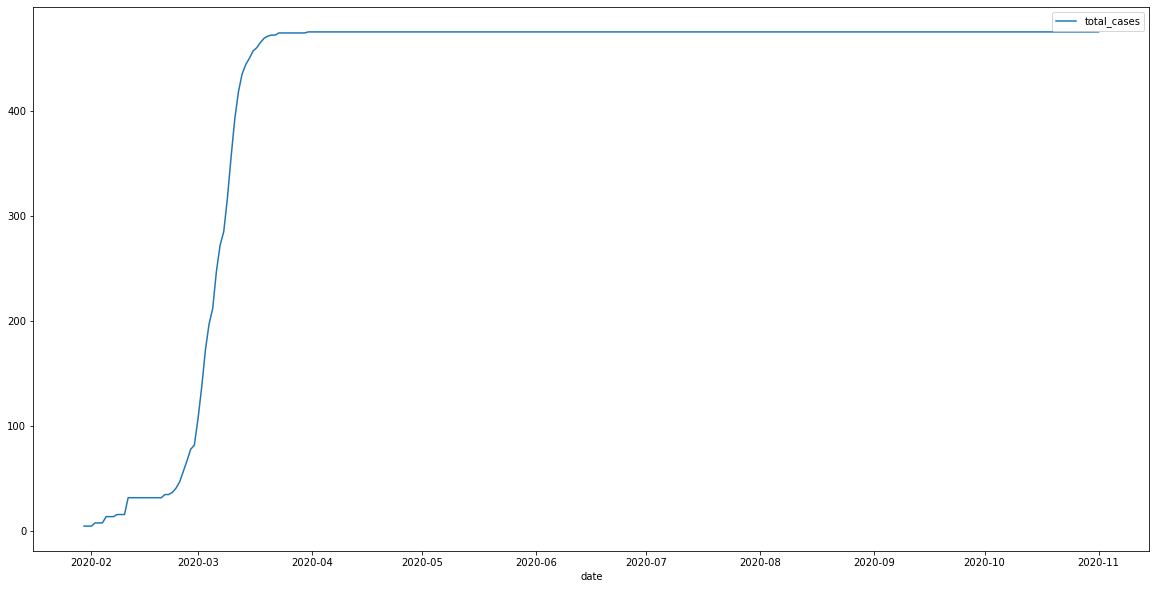

In [195]:
#visuaizing total cases by date

plot_date = covid_cases.groupby('date').size().reset_index(name='total_cases').set_index('date')
plot_date.plot(kind='line', figsize=(20,10))

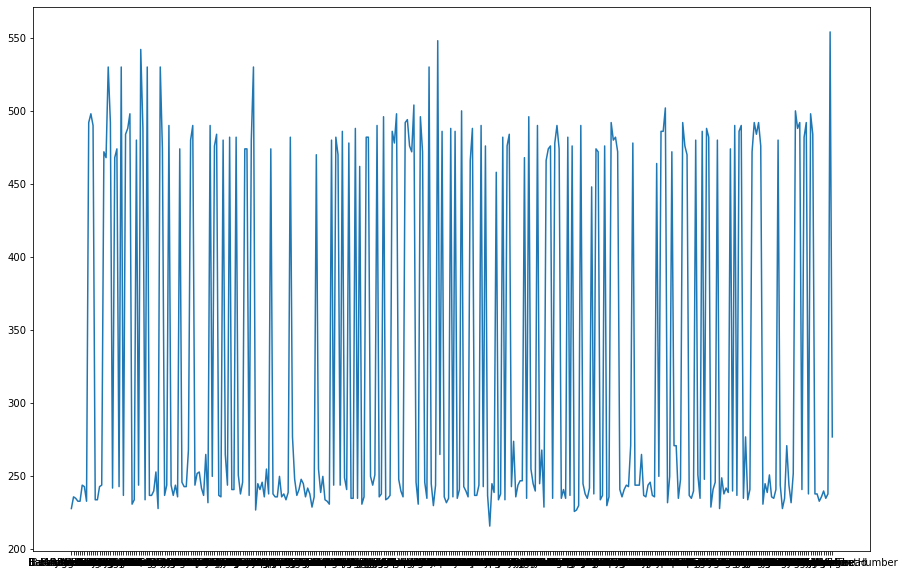

In [196]:
#visualizing groupby of total cases by areaName

count_by_areaName = covid_cases.groupby('areaName').size()

plt.figure(figsize=(15,10))
plt.xlabel=('areaName')
plt.ylabel=('total_cases')
plt.title=('Total cases by Area')
plt.plot(count_by_areaName)

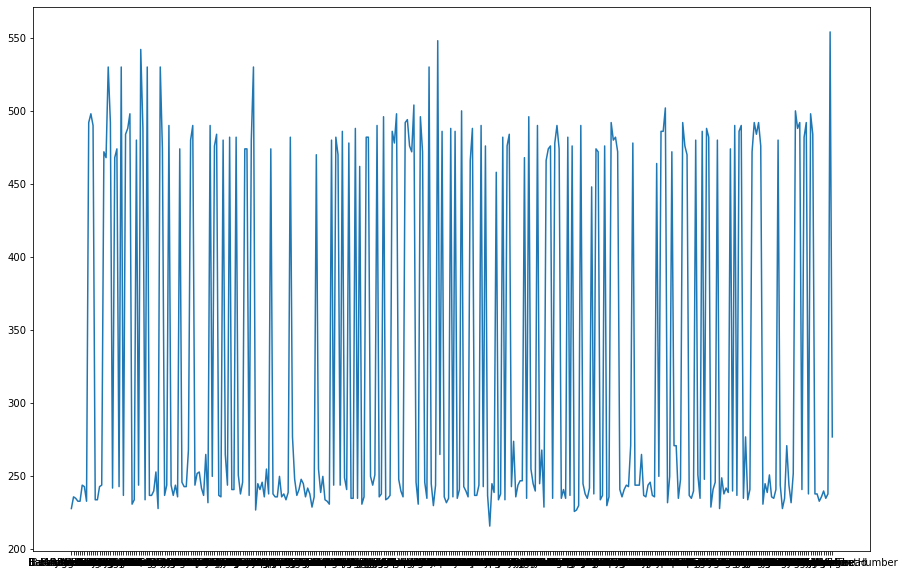

In [197]:
#visualizing groupby of percentage by areaName

count_by_areaName = covid_cases.groupby('areaName').size()

plt.figure(figsize=(15,10))
plt.xlabel=('areaName')
plt.ylabel=('percentage')
plt.title=('Percentage by Area')
plt.plot(count_by_areaName)

<AxesSubplot:xlabel='areaName'>

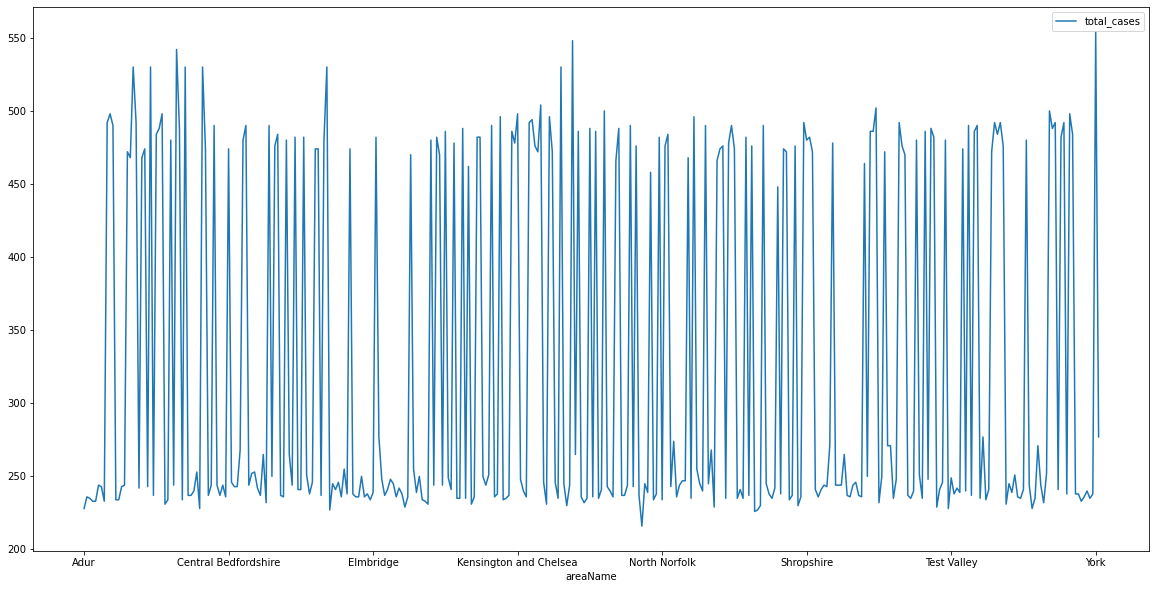

In [198]:
#Visualizing by areaName setting index as areaName. areaName by total cases

plot_area = covid_cases.groupby('areaName').size().reset_index(name='total_cases').set_index('areaName')
plot_area.plot(kind='line', figsize=(20,10))

In [ ]:
#count of total case by areaName

covid_cases['areaName'].value_counts()

<AxesSubplot:title={'center':'total case by area'}>

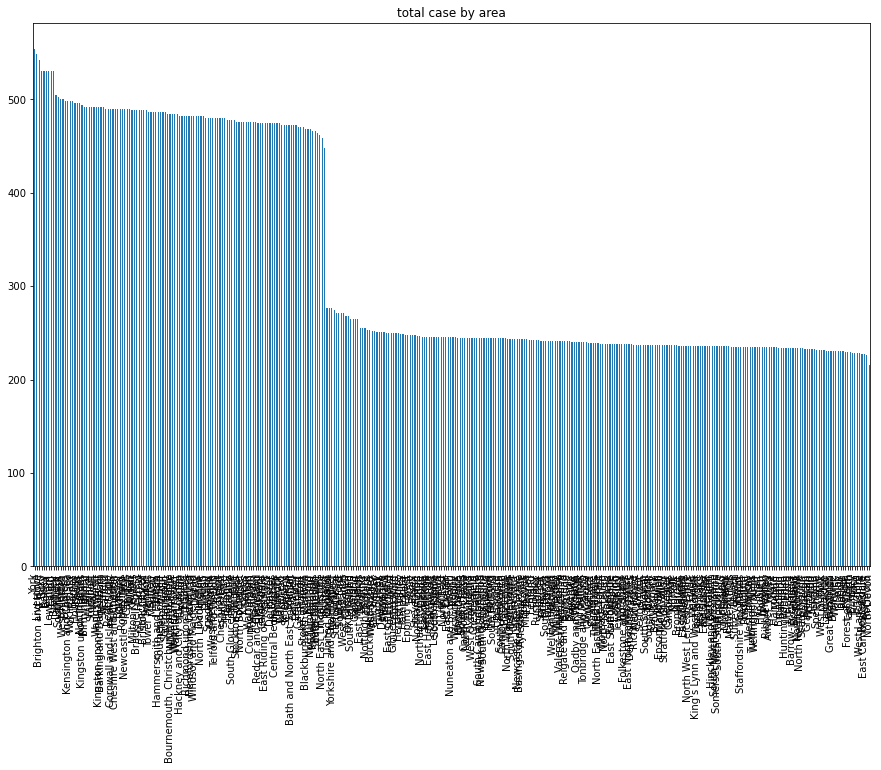

In [199]:
#viualizing count of total cases by areaName

covid_cases['areaName'].value_counts().plot.bar(title='total case by area', figsize=(15,10))

In [200]:
#count of total case by date

covid_cases['date'].value_counts()

2020-08-01    475
2020-08-08    475
2020-08-10    475
2020-08-11    475
2020-08-12    475
             ... 
2020-02-03      8
2020-02-02      8
2020-02-01      5
2020-01-30      5
2020-01-31      5
Name: date, Length: 277, dtype: int64

<AxesSubplot:title={'center':'total case by date'}>

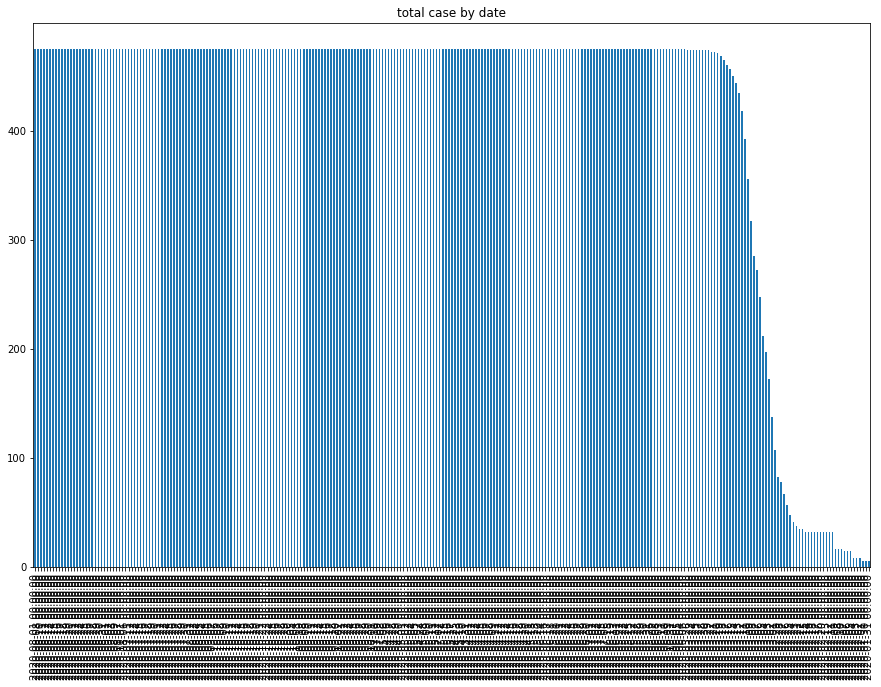

In [238]:
#viualizing count of total cases by date

covid_cases['date'].value_counts().plot.bar(title='total case by date', figsize=(15,10))

In [202]:
#calling by dataset again

covid_cases.head()

,areaType,areaName,date,Age 0_4,Age 10_14,Age 15_19,Age 20_24,Age 25_29,Age 30_34,Age 35_39,...,Age 60_64,Age 65_69,Age 70_74,Age 75_79,Age 80_84,Age 85_89,Age 90+,Age unassigned,total_cases,percentage
0,ltla,Hartlepool,2020-03-16,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.000022
1,ltla,Hartlepool,2020-03-17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
2,ltla,Hartlepool,2020-03-18,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.000022
3,ltla,Hartlepool,2020-03-19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,ltla,Hartlepool,2020-03-20,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0.000022


In [204]:
#group dataframe by areaName and total for each age range

covid_cases_Area = covid_cases.groupby("areaName").sum()

In [245]:
covid_cases_Area

,Age 0_4,Age 10_14,Age 15_19,Age 20_24,Age 25_29,Age 30_34,Age 35_39,Age 40_44,Age 45_49,Age 50_54,...,Age 60_64,Age 65_69,Age 70_74,Age 75_79,Age 80_84,Age 85_89,Age 90+,Age unassigned,total_cases,percentage
areaName,,,,,,,,,,,,,,,,,,,,,
Adur,2,6,37,30,32,27,17,26,39,28,...,23,12,18,12,16,20,21,2,403,0.008886
Allerdale,7,18,84,79,66,50,51,45,57,86,...,56,46,50,45,57,38,39,5,963,0.021235
Amber Valley,22,31,147,143,145,130,141,117,140,145,...,102,74,81,76,63,73,67,10,1863,0.041080
Arun,12,19,101,93,56,43,42,36,54,79,...,30,33,32,46,30,38,37,5,866,0.019096
Ashfield,28,26,123,216,175,173,158,157,162,224,...,123,55,81,76,77,91,66,19,2256,0.049746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wycombe,19,38,164,136,116,102,95,108,99,105,...,63,37,41,40,34,46,48,6,1410,0.031091
Wyre,38,50,165,162,207,173,184,131,162,198,...,155,123,120,112,121,110,102,15,2575,0.056780
Wyre Forest,16,14,80,83,80,101,63,68,101,95,...,67,39,54,46,54,48,35,5,1153,0.025424


In [206]:
#shape of dataframe

covid_cases_Area.shape

(352, 22)

In [207]:
#information about the dataframe

covid_cases_Area.info

<bound method DataFrame.info of                           Age 0_4  Age 10_14  Age 15_19  Age 20_24  Age 25_29  \
areaName                                                                        
Adur                            2          6         37         30         32   
Allerdale                       7         18         84         79         66   
Amber Valley                   22         31        147        143        145   
Arun                           12         19        101         93         56   
Ashfield                       28         26        123        216        175   
...                           ...        ...        ...        ...        ...   
Wycombe                        19         38        164        136        116   
Wyre                           38         50        165        162        207   
Wyre Forest                    16         14         80         83         80   
York                          140        100       1194       1502        656

In [239]:
#group dataframe by date and total for each age range

covid_cases_date = covid_cases.groupby("date").sum()

In [246]:
covid_cases_date

,Age 0_4,Age 10_14,Age 15_19,Age 20_24,Age 25_29,Age 30_34,Age 35_39,Age 40_44,Age 45_49,Age 50_54,...,Age 60_64,Age 65_69,Age 70_74,Age 75_79,Age 80_84,Age 85_89,Age 90+,Age unassigned,total_cases,percentage
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,0,0,0,5,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,7,0.000154
2020-01-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
2020-02-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
2020-02-02,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,5,0.000110
2020-02-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-28,2011,3072,6606,10282,10165,9149,8227,7656,8051,8341,...,5407,3299,2595,1751,1622,1375,1095,413,100500,2.216087
2020-10-29,1842,3350,6133,9821,9699,8662,7994,7556,8262,8136,...,5338,3255,2849,2113,1772,1361,1344,437,99028,2.183629
2020-10-30,2014,3185,6131,9404,9117,8572,7645,7243,7718,8315,...,5636,3370,2888,2077,1795,1502,1222,312,97479,2.149472


In [210]:
#information about the dataframe

covid_cases_date.info

<bound method DataFrame.info of             Age 0_4  Age 10_14  Age 15_19  Age 20_24  Age 25_29  Age 30_34  \
date                                                                         
2020-01-30        0          0          0          5          0          0   
2020-01-31        0          0          0          0          0          0   
2020-02-01        0          0          0          0          0          0   
2020-02-02        0          0          0          0          0          0   
2020-02-03        0          0          0          0          0          0   
...             ...        ...        ...        ...        ...        ...   
2020-10-28     2011       3072       6606      10282      10165       9149   
2020-10-29     1842       3350       6133       9821       9699       8662   
2020-10-30     2014       3185       6131       9404       9117       8572   
2020-10-31     1300       2464       4392       6284       6985       6450   
2020-11-01     1140       2278  

In [211]:
#shape of dataframe

covid_cases_date.shape

(277, 22)

<AxesSubplot:title={'center':'Hartlepool'}>

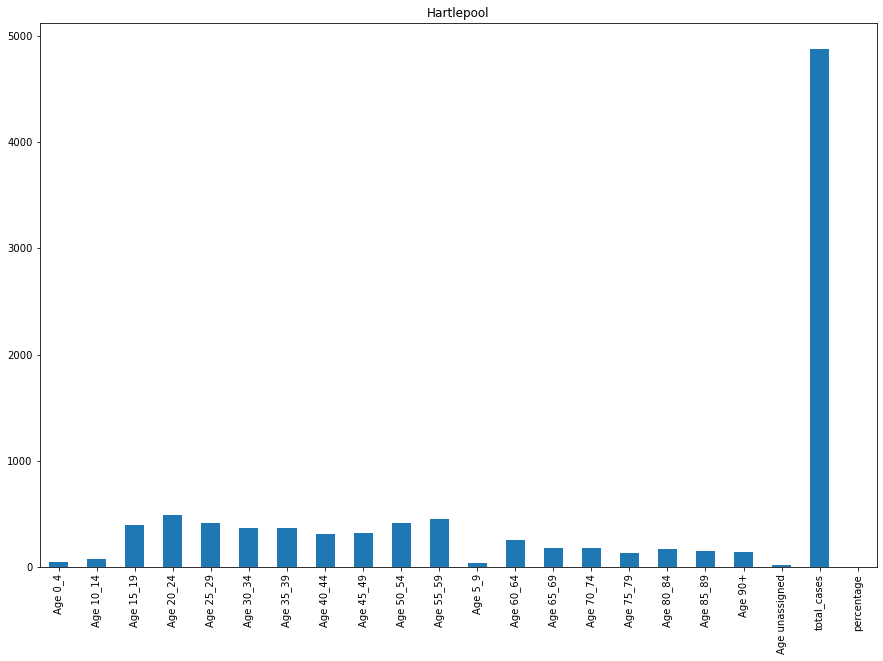

In [212]:
#visualizing the total number of cases for age range for areaName

covid_cases_Area.loc["Hartlepool"].plot.bar(title='Hartlepool', figsize=(15,10))

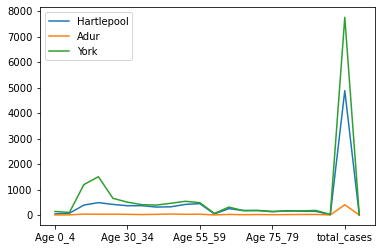

In [213]:
#visualizing mutlple areaNames with the total number of cases for each age range

covid_cases_Area.loc["Hartlepool"].plot()
covid_cases_Area.loc["Adur"].plot()
covid_cases_Area.loc["York"].plot()
plt.legend()
plt.show()

<AxesSubplot:>

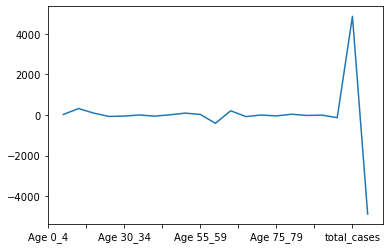

In [214]:
# visualizing first derivative of the curve of a areaName

covid_cases_Area.loc["Hartlepool"].diff().plot()

<AxesSubplot:>

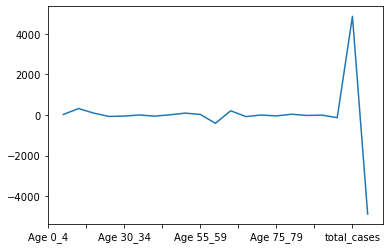

In [215]:
#visualizing second derivative 

covid_cases_Area.loc["Hartlepool"].diff(1).plot()

<AxesSubplot:>

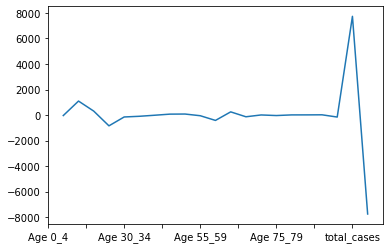

In [216]:
#visualizing first derivative 

covid_cases_Area.loc["York"].diff().plot()

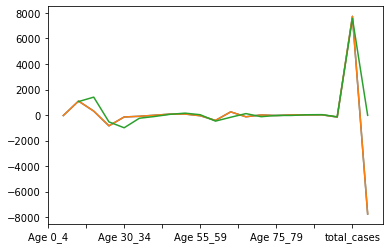

In [217]:
#visualizing the first, second and third derivative of York

covid_cases_Area.loc["York"].diff().plot()
covid_cases_Area.loc["York"].diff(1).plot()
covid_cases_Area.loc["York"].diff(2).plot()
plt.show()

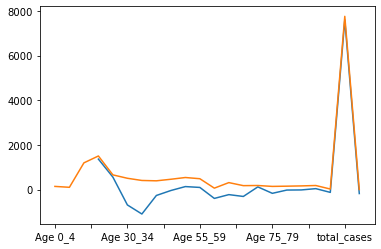

In [218]:
#difference between rows in the column areaName

covid_cases_Area.loc["York"].diff(periods=3).plot()
covid_cases_Area.loc["York"].plot()
plt.show()

<AxesSubplot:title={'center':'October 31st, 2020'}>

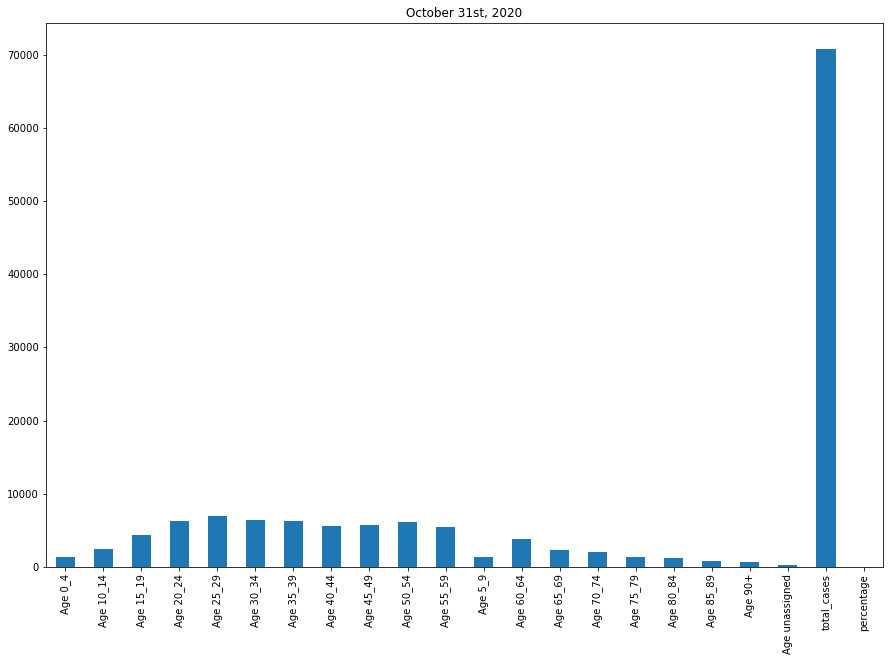

In [268]:
#visualizing the cases for a day by age range 

covid_cases_date.loc["2020-10-31"].plot.bar(title='October 31st, 2020', figsize=(15,10))

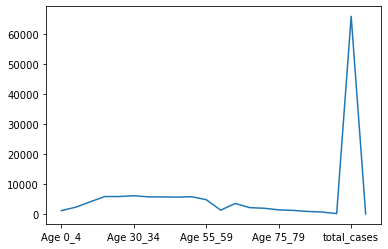

In [244]:
#visualizing the cases for a day by age range 

covid_cases_date.loc["2020-11-01"].plot()
plt.show()

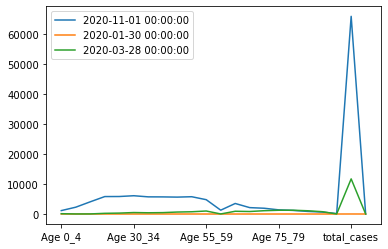

In [264]:
#visualizing mutlple areaNames with the total number of cases for each age range

covid_cases_date.loc["2020-11-01"].plot()
covid_cases_date.loc["2020-01-30"].plot()
covid_cases_date.loc["2020-03-28"].plot()
plt.legend()
plt.show()

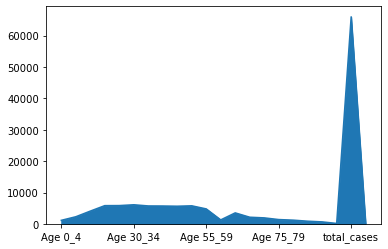

In [267]:
#visualizing the total number of cases for date

covid_cases_date.loc["2020-11-01"].plot.area()
plt.show()

In [271]:
#create a new dataframe with only the areaName and total case 
# create a new dataframe with only needed column

covid_Area_total = pd.DataFrame(covid_cases_Area["total_cases"])

In [272]:
covid_Area_total.head()

,total_cases
areaName,
Adur,403
Allerdale,963
Amber Valley,1863
Arun,866
Ashfield,2256


In [273]:
#repeat same for date

covid_date_total = pd.DataFrame(covid_cases_date["total_cases"])

In [274]:
covid_date_total.head()

,total_cases
date,
2020-01-30,7
2020-01-31,0
2020-02-01,0
2020-02-02,5
2020-02-03,0


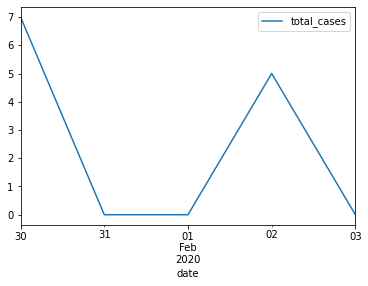

In [275]:
#visualizing the total cases between range of dates

covid_date_total.loc["2020-01-30" : "2020-02-03"].plot()
plt.legend()
plt.show()

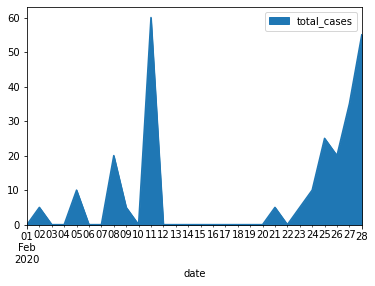

In [279]:
#visualizing the total cases for the month of February
covid_date_total.loc["2020-02-01" : "2020-02-28"].plot.area()
plt.legend()
plt.show()

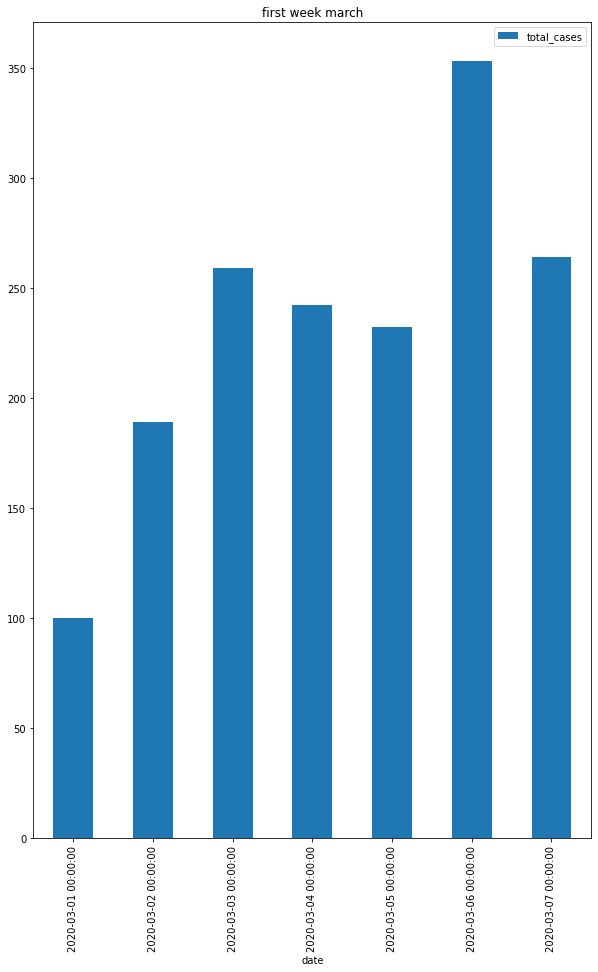

In [280]:
#visualizing the total cases for one week
covid_date_total.loc["2020-03-01" : "2020-03-7"].plot.bar(title='first week march', figsize=(10,15))
plt.legend()
plt.show()

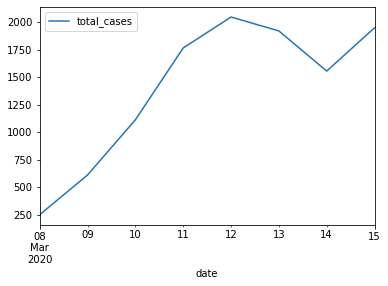

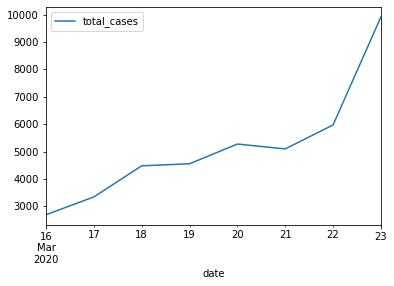

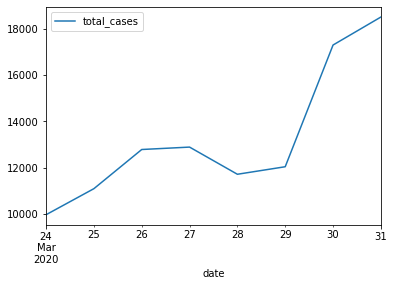

In [281]:
covid_date_total.loc["2020-03-08" : "2020-03-15"].plot()
covid_date_total.loc["2020-03-16" : "2020-03-23"].plot()
covid_date_total.loc["2020-03-24" : "2020-03-31"].plot()
plt.legend()
plt.show()

In [309]:
#create a new dataframe with areaName, date and total cases

area_date_total = covid_cases.get(['areaName', 'date', 'total_cases'])
area_date_total

,areaName,date,total_cases
0,Hartlepool,2020-03-16,1
1,Hartlepool,2020-03-17,0
2,Hartlepool,2020-03-18,1
3,Hartlepool,2020-03-19,0
4,Hartlepool,2020-03-20,1
...,...,...,...
115022,Worcestershire,2020-10-28,171
115023,Worcestershire,2020-10-29,162
115024,Worcestershire,2020-10-30,156
115025,Worcestershire,2020-10-31,125


In [330]:
#top 10 largest cases with date and areaName

x = area_date_total.sort_values('total_cases', ascending=False).nlargest(10, 'total_cases', keep='first')
x.

,areaName,date,total_cases
76027,England,2020-10-26,22734
76304,United Kingdom,2020-10-26,22734
76297,United Kingdom,2020-10-19,22080
76020,England,2020-10-19,22080
76022,England,2020-10-21,21473
76299,United Kingdom,2020-10-21,21473
76298,United Kingdom,2020-10-20,21314
76021,England,2020-10-20,21314
76305,United Kingdom,2020-10-27,20477
76028,England,2020-10-27,20477
